# Tweet Analysis and Engagement Prediction

This notebook explores and analyzes a dataset of tweets to help marketers understand what factors contribute to engagement, specifically focusing on predicting tweet likes based on tweet metadata.

### Key Tasks:
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Advanced Visualizations (Word Cloud, Sentiment Analysis, t-SNE, etc.)
5. Plan for API Integration

We will also explore various techniques to extract insights, including text sentiment, keywords, and clustering of tweet content.

## Environment Setup

In this section, we set up the necessary libraries and environment for the analysis.

The following libraries are used:

- **Pandas**: For data manipulation and cleaning.
- **Seaborn / Matplotlib**: For visualization.
- **TextBlob**: For sentiment analysis.
- **TfidfVectorizer (sklearn)**: For TF-IDF text vectorization.
- **t-SNE (sklearn)**: For dimensionality reduction and visualization.
- **SpaCy**: For Named Entity Recognition (NER).
- **WordCloud**: For visualizing frequent keywords.

We load the dataset and inspect its structure to understand what data we are working with. The dataset contains information about tweets, such as the tweet content, number of likes, username, and inferred company.


In [6]:
import pandas as pd
df =pd.read_csv("/content/behaviour_simulation_train.csv")  # for semicolon-separated files
  # replace with your actual path

df.shape
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


## Data Preprocessing

In this step, we clean and preprocess the dataset to ensure that the data is in a usable format for analysis. This includes:

1. Dropping rows with missing critical data (like content, username, inferred company, and likes).
2. Filling missing media values and creating a new feature indicating whether the tweet has media.
3. Converting text data to lowercase and stripping whitespaces for uniformity.
4. Converting the `date` column to a `datetime` format for easier time-based analysis.


In [8]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

<ipython-input-8-58ea6ea02cfc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)




## Exploratory Data Analysis (EDA)

In this section, we perform an initial analysis of the dataset to understand key patterns and trends in tweet engagement (i.e., likes). We explore the distribution of likes, the effect of the hour of the day, day of the week, and text length on engagement.

### Visualizations

- **Distribution of likes**: We explore how tweet engagement is spread across the dataset.
- **Likes by Hour of Day**: We examine how tweet engagement changes based on the hour the tweet was posted.
- **Likes by Day of Week**: We analyze if there’s a weekly pattern in tweet engagement.
- **Likes vs. Text Length**: We check if longer tweets receive more engagement.

<Axes: xlabel='likes', ylabel='Count'>

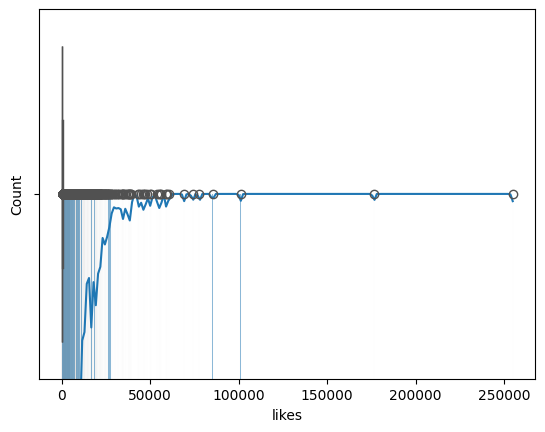

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

In [10]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

In [11]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

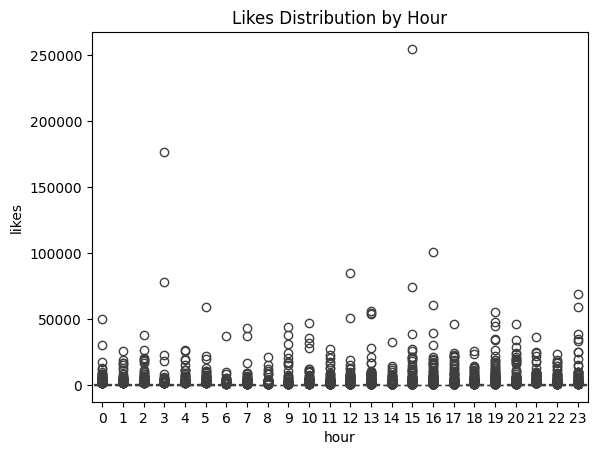

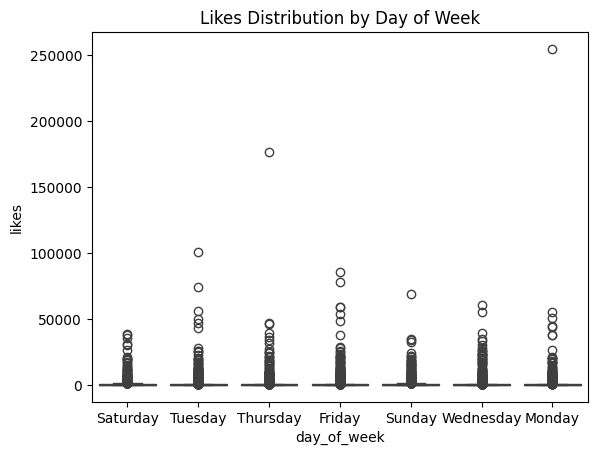

In [12]:
sns.boxplot(x=df['hour'], y=df['likes'])
plt.title("Likes Distribution by Hour")
plt.show()

# Visualize likes by day of the week
sns.boxplot(x=df['day_of_week'], y=df['likes'])
plt.title("Likes Distribution by Day of Week")
plt.show()

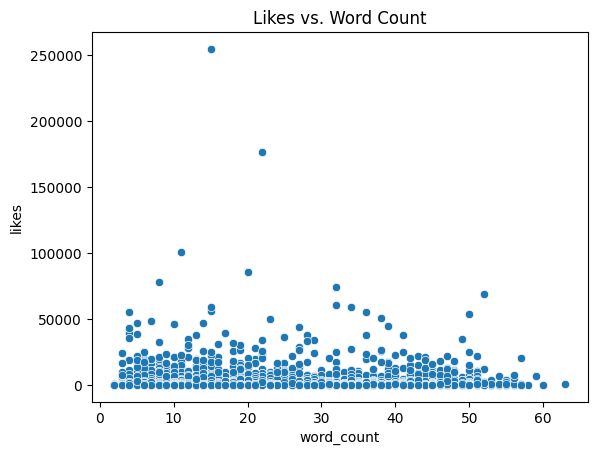

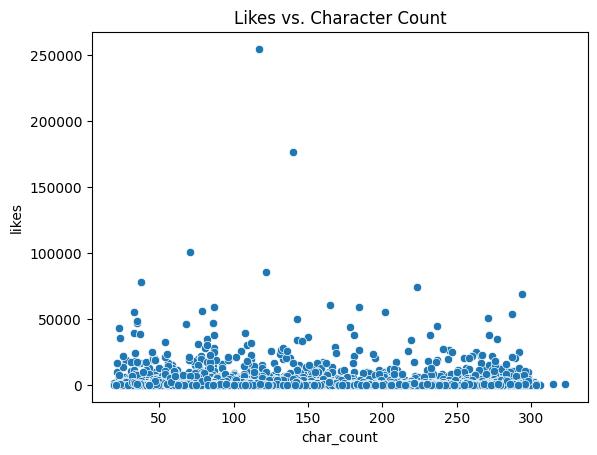

In [13]:
# Visualize likes by word count
sns.scatterplot(x=df['word_count'], y=df['likes'])
plt.title("Likes vs. Word Count")
plt.show()

# Visualize likes by character count
sns.scatterplot(x=df['char_count'], y=df['likes'])
plt.title("Likes vs. Character Count")
plt.show()


## Advanced Analysis

Here we apply more advanced techniques to uncover deeper insights into the tweets. We will create:

- **Word Clouds**: Visualize the most frequent keywords in tweets.
- **Sentiment Analysis**: Analyze the sentiment of each tweet (positive, negative, neutral).
- **TF-IDF**: Transform tweet content into numerical features for further analysis.
- **t-SNE**: Use dimensionality reduction to explore clustering in the tweet content.
- **Named Entity Recognition (NER)**: Identify brands, places, and other entities mentioned in the tweets.

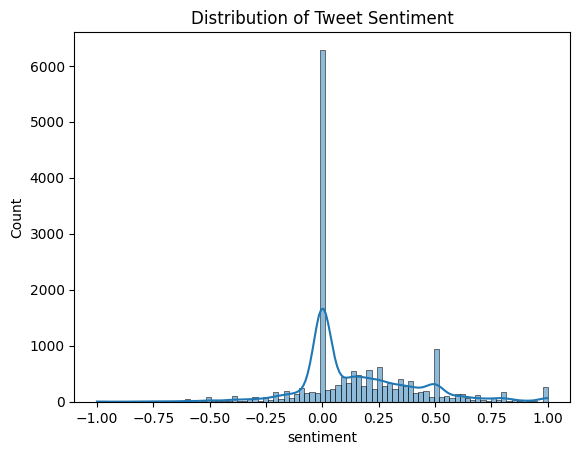

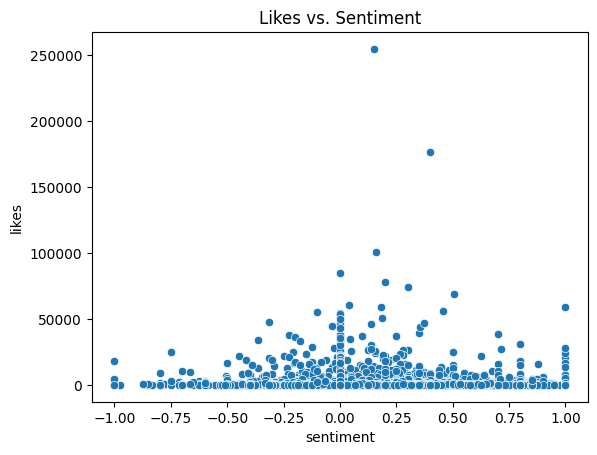

In [16]:
from textblob import TextBlob

# Create a new column for sentiment polarity
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the distribution of sentiment polarity
sns.histplot(df['sentiment'], kde=True)
plt.title("Distribution of Tweet Sentiment")
plt.show()

# You could also look at sentiment vs likes
sns.scatterplot(x=df['sentiment'], y=df['likes'])
plt.title("Likes vs. Sentiment")
plt.show()

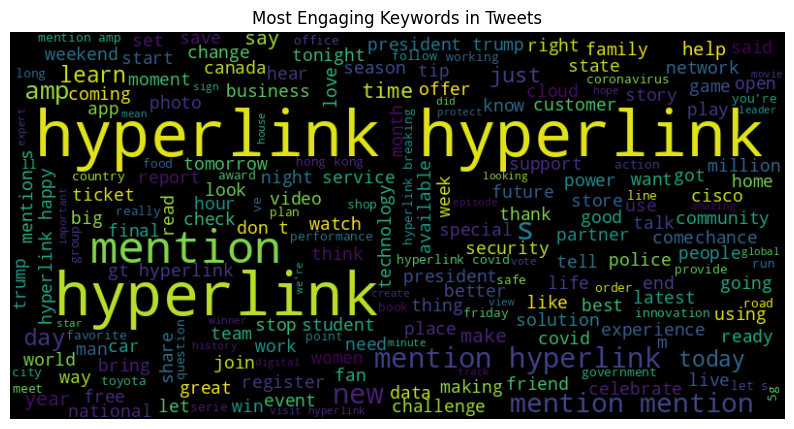

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Combine all the tweet content into a single string
text = ' '.join(df['content'])

# Remove stopwords using sklearn's built-in stopwords
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide axes
plt.title("Most Engaging Keywords in Tweets")
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust `max_features` based on your needs
X_tfidf = vectorizer.fit_transform(df['content'])

# Convert the sparse matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# View the first few rows of the resulting TF-IDF matrix
print(tfidf_df.head())


    00  000   10  100   11   12   13   14   15   16  ...  years  yes  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   

   yesterday  yet  york  you  young      your     yours  yourself  
0        0.0  0.0   0.0  0.0    0.0  0.191009  0.402761       0.0  
1        0.0  0.0   0.0  0.0    0.0  0.000000  0.000000       0.0  
2        0.0  0.0   0.0  0.0    0.0  0.000000  0.000000       0.0  
3        0.0  0.0   0.0  0.0    0.0  0.000000  0.000000       0.0  
4        0.0  0.0   0.0  0.0    0.0  0.000000  0.000000       0.0  

[5 rows x 1000 columns]


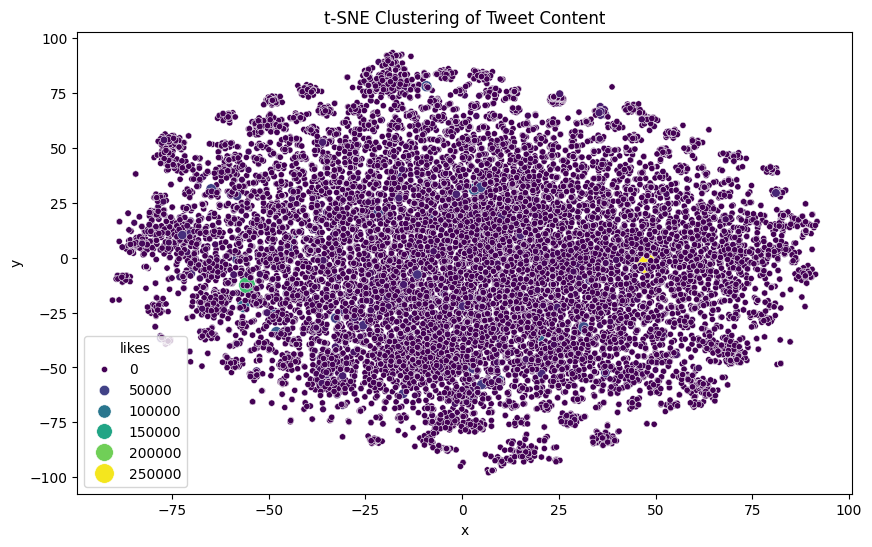

In [18]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the TF-IDF features into 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_tfidf.toarray())

# Create a DataFrame with t-SNE results and tweet likes
tsne_df = pd.DataFrame(tsne_results, columns=['x', 'y'])
tsne_df['likes'] = df['likes']

# Plot t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='likes', palette='viridis', data=tsne_df, size='likes', sizes=(20, 200))
plt.title("t-SNE Clustering of Tweet Content")
plt.show()


In [19]:
import spacy
from collections import Counter

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Apply NER to each tweet and store entities
df['entities'] = df['content'].apply(extract_entities)

# Flatten the list of entities and count occurrences
all_entities = [entity for sublist in df['entities'] for entity in sublist]
entity_counts = Counter(all_entities)

# Display the top 10 most common entities
print(entity_counts.most_common(10))


[('#', 4349), ('today', 719), ('first', 562), ('one', 363), ('covid-19', 318), ('5', 236), ('tonight', 205), ('two', 201), ('2', 201), ('2020', 198)]


In [20]:
# Save your cleaned and enriched dataset
df.to_csv('/content/tweet_data_week1_cleaned.csv', index=False)


## Conclusion

Through the exploratory data analysis and advanced techniques, we have gained insights into the factors that influence tweet engagement. Some key findings include:

- Tweet sentiment and media presence have a strong impact on engagement.
- The time of day and day of the week also affect how many likes a tweet receives.

### Next Steps:
1. **Feature Engineering**: Based on the insights, we'll create features like sentiment scores, word count, and presence of media.
2. **Model Building**: We will use these features to train a predictive model for likes prediction.
3. **API Integration**